<table class='center'>
    <tr style="background-color:white">
      <td>
          <center><h1> To Predict whether Question Asked on Quora are Sincere or Insincere</h1></center>
          <hr>
          <center><h2>Interestship 5.0 by Clique Community</h2></center>
          <hr>
          <center><h3>Mentee Name: Anubha Sharma</h3></center>
      </td>
     </tr>
</table>

#### Understanding the Project First
<ul>
    <li>An Insincere question is defined as Questios Intended to make a statement rather than look for helpful answers</li>
</ul>

#### Some Characteristics that can Signify that a Question is Insincere:
<ol>
    <li>Has a Non Neutral Tone:
        <ul>
            <li>Has an exaggerated tone to underscore a point about a group of people</li>
            <li>Is rhetorical and meant to imply a statement about a group of people</li>
        </ul>
        <br>
    <li>Is disparaging or inflammatory:
        <ul>
            <li>Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype</li>
            <li>Makes disparaging attacks/insults against a specific person or group of people</li>
            <li>Based on an outlandish premise about a group of people</li>
            <li>Disparages against a characteristic that is not fixable and not measurable</li>  
        </ul>
        <br>
    <li>Isn't grounded in reality:
        <ul>
            <li>Based on false information, or contains absurd assumptions</li>
        </ul>
        <br>
</ol>

#### About the Data Set
<ul>
    <li>The training data includes the question that was asked, and whether it was identified as insincere (target = 1).</li>
    <li>The ground-truth labels contain some amount of noise: they are not guaranteed to be perfect.</li>
</ul>
    

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("GPU", "available" if tf.config.list_physical_devices("GPU") else
      "not available")

GPU available


In [ ]:
#Importing the basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the CSV File

data=pd.read_csv('train.csv')
data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0
...,...,...,...
66289,0cffaa41cb1ab3295605,What advice would you give to someone who is m...,0.0
66290,0cffb80e2cefe8467c7e,Where are the famous coaching centres in India...,0.0
66291,0cffbec649b5f6b5518e,To what extent is Buck from Call of the Wild e...,0.0
66292,0cffcf714cc1d5d5e344,What would happen if India had only Hindi lang...,0.0


#### Basics Insights about the Dataset

In [ ]:
data.describe()

,target
count,66293.000000
mean,0.061289
std,0.239861
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66294 entries, 0 to 66293
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   qid            66294 non-null  object 
 1   question_text  66294 non-null  object 
 2   target         66293 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
print(data.shape)

(66294, 3)


#### Dataset has more than 13 Lakh rows and 3 colums

#### The columns are :
>qid - unique question identifier

>question_text - Quora question text

>target - a question labeled "insincere" has a value of 1, otherwise 0

### What is NLP (Natural Language Processing)?
<ul>
    <li>NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech.</li></ul>
<ol>Examples of NLP:
    <ol>
        <li>Speech Recognition</li>
        <li>Document Summarization</li>
        <li>Machine Translation</li>
    </ol>
</ol>

## Text Preprocessing

#### In NLP, text preprocessing is the first step in the process of building a model.

### Step 1: Punctutation Removal


In [ ]:
import string
string.punctuation

def removing_punctuation(text):
    ptfree="".join([i for i in text if i not in string.punctuation])
    return ptfree
#storing the puntuation free text
data['cleaned_ques']= data['question_text'].apply(lambda x:removing_punctuation(x))
data.head()


,qid,question_text,target,cleaned_ques
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0,How did Quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0,Do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0,Why does velocity affect time Does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0,How did Otto von Guericke used the Magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0,Can I convert montra helicon D to a mountain b...


### Step 2: Lowering Text

>Converting a word to lower case (NLP -> nlp).
Words like Book and book mean the same but when not converted to the lower case those two are represented as two different words in the vector space model (resulting in more dimensions).


In [ ]:
data['ques_lower']= data['cleaned_ques'].apply(lambda x: x.lower())


### Step 3: Tokenization

>NLTK contains a module called tokenize() which further classifies into two sub-categories: Sentence Tokenization and Word Tokenization.<ul><li>NLTK — The Natural Language ToolKit is one of the best-known and most-used NLP libraries, useful for all sorts of tasks from tokenization, stemming, tagging, parsing, and beyond</li>
</ul>


>Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.</li>

><ul>Text into sentences tokenization
> <li>Sentences into words tokenization</li>
> <li>Sentence Tokenization - We use the sent_tokenize() method to split a document or paragraph into sentences</li>
 </ul>

<ul><li>
Punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
    </li></ul>

<ul><li>
NLTK — The Natural Language ToolKit is one of the best-known and most-used NLP libraries, useful for all sorts of tasks from tokenization, stemming, tagging, parsing, and beyond</li>
</ul>


In [ ]:
#Installing all the required packages
!pip install nltk
!pip install spacy

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
data['ques_tokenized']= data['ques_lower'].apply(lambda x: tokenization(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Step 4: Stop Words Removal

>Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.


In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

data['no_stopwords']= data['ques_tokenized'].apply(lambda x:remove_stopwords(x))
data['no_stopwords'][0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']

### Step 5: Lemmatization

<ul><li>Lemmatization reduces the words to a word existing in the language.</li></ul>


In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  lemm_text=" ".join(lemm_text)
  return lemm_text

data['ques_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data['ques_lemmatized'][0]

[nltk_data] Downloading package wordnet to /root/nltk_data...


'quebec nationalist see province nation 1960s'

In [ ]:
preprocessed_data= data[['qid','question_text','ques_lemmatized','target']]
preprocessed_data.to_csv('quora_preprocessed.csv',index=False)

<center>
<hr>
    <h2>Exploratory Data Analysis</h2>
    </center>


In [ ]:
!pip install wordcloud

In [ ]:
preprocessed_data.head()

,qid,question_text,ques_lemmatized,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,quebec nationalist see province nation 1960s,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",adopted dog would encourage people adopt shop,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,velocity affect time velocity affect space geo...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,otto von guericke used magdeburg hemisphere,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,convert montra helicon mountain bike changing ...,0.0


In [ ]:
preprocessed_data.describe()

,target
count,66293.000000
mean,0.061289
std,0.239861
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66294 entries, 0 to 66293
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   qid              66294 non-null  object 
 1   question_text    66294 non-null  object 
 2   ques_lemmatized  66294 non-null  object 
 3   target           66293 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
preprocessed_data.isna().sum()

qid                0
question_text      0
ques_lemmatized    0
target             1
dtype: int64

In [ ]:
preprocessed_data["target"].value_counts()

0.0    62230
1.0     4063
Name: target, dtype: int64

In [ ]:
#Text Word startistics: min.mean, max and interquartile range
# This is mainly done to find out more about the Text Length

txt_length = preprocessed_data.ques_lemmatized.str.split().str.len()
txt_length.describe()

count    66294.000000
mean         6.514964
std          3.699322
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         33.000000
Name: ques_lemmatized, dtype: float64

In [ ]:
# Defining Sincere and Insincere Words
sincere_words = preprocessed_data[preprocessed_data['target']==0]['ques_lemmatized']
insincere_words = preprocessed_data[preprocessed_data['target']==1]['ques_lemmatized']

<center><h1 style="color:Blue;">Graph-1: See the distribution of Target Value in DataSet</h1></center>


<Axes: ylabel='target'>

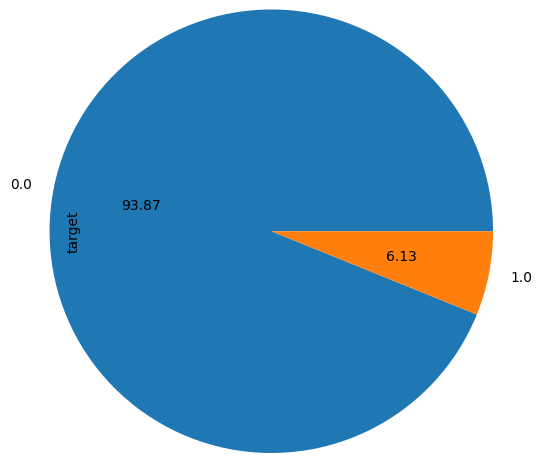

In [ ]:
preprocessed_data["target"].value_counts().plot(kind="pie",autopct='%0.2f',radius=1.5)

<center><h3 style="color:red;">From the graph we can conclude that the data is highly imbalanced with 93.81 % of Sincere Data and Only 6.19% of Insincere Data</h3></center><hr>
<ul><h3><li>Target1: Insincere Data</li></h3>
        <h3><li>Target0: Sincere Data</li></h3>
    </ul>
    
<center><h1 style="color:Blue;">Graph-2: Word Cloud</h1></center>
<hr>
<h1> What is a Word Cloud?</h1>
<ul>
    <li><h4>A word cloud is a collection, or cluster, of words depicted in different sizes.</h4></li>
    <li><h4>The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.</h4></li>
    </ul>


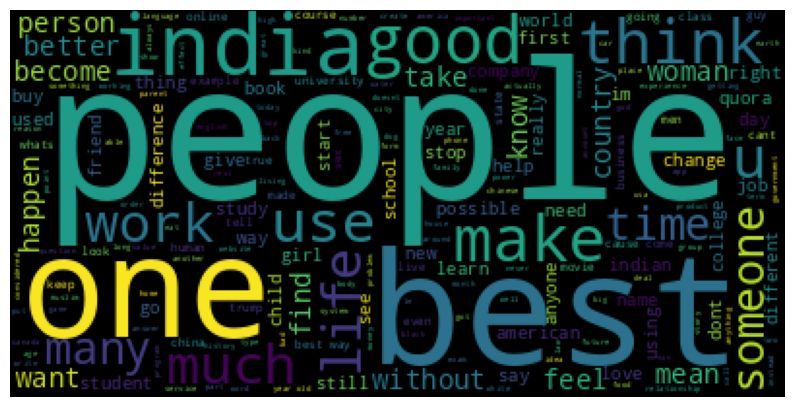

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# initialize the word cloud

wordcloud = WordCloud( background_color='black', width=400, height=200)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(preprocessed_data['ques_lemmatized']))

# plotting the word cloud
plt.figure(figsize=(10,20))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()


<center><h2>Word Cloud-1: All the words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-1</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>india</li>
    <li>one</li>
    <li>make</li>
    <li>best</li>
</ol>

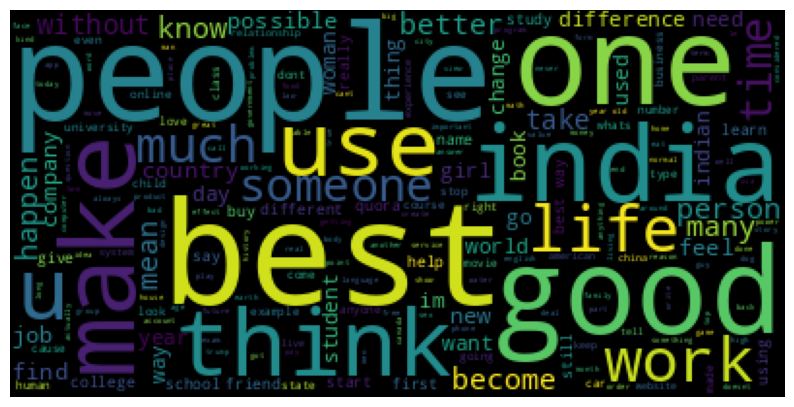

In [ ]:
sincere_word = ' '.join(sincere_words)
wc = wordcloud.generate(sincere_word)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

<center><h2>Word Cloud-2: All the Sincere words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-2</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>one</li>
    <li>india</li>
    <li>good</li>
    <li>best</li>
</ol>

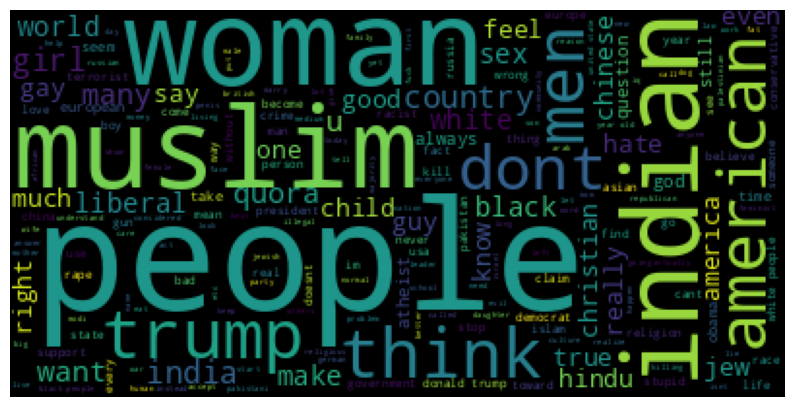

In [ ]:
insincere_word = ' '.join(insincere_words)
wc = wordcloud.generate(insincere_word)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

<center><h2>Word Cloud-3: All the Insincere words present in the DataSet</h2></center>
<h3> Conclusion from Word Cloud-3</h3>
<ol>Some of the maximum used words in the dataset are:
    <li>women</li>
    <li>people</li>
    <li>muslim</li>
    <li>trump</li>
</ol>
<center><h1 style="color:Blue;">Graph-3: Frequency of Top 20 Words in the DataSet</h1></center>
<h2> What is Count Vectorizer</h2>
<ul><li>CountVectorizer is a great tool provided by the scikit-learn library in Python.</li>
<li>It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.</li>
    <li>This functionality makes it a highly flexible feature representation module for text.</li>
    <hr>
    <li><h3>Bag Of Words:</h3></li><br>
    Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.
    </ul>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

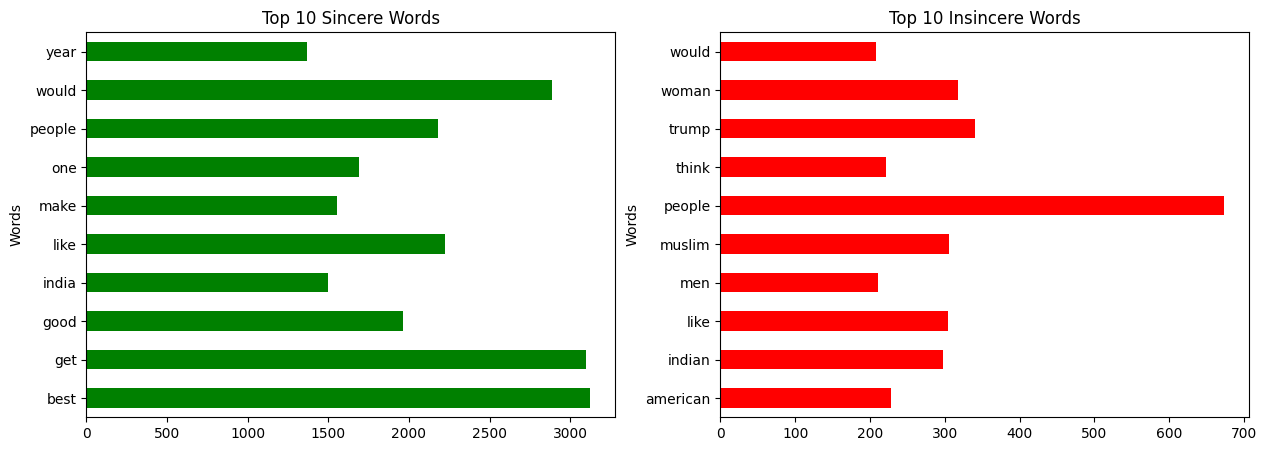

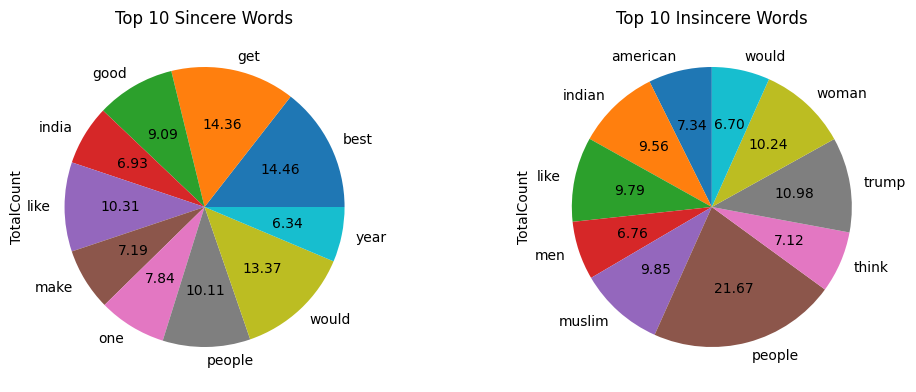

In [ ]:
fig =plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plot_2=get_top_n_words(sincere_words,10)
all_sincere_words=pd.DataFrame(plot_2,columns=['Words','TotalCount'])
all_sincere_words.groupby('Words').sum()['TotalCount'].plot.barh(color='green')
plt.title("Top 10 Sincere Words")

plt.subplot(1, 2, 2)
plot_3=get_top_n_words(insincere_words,10)
all_insincere_words=pd.DataFrame(plot_3,columns=['Words','TotalCount'])
all_insincere_words.groupby('Words').sum()['TotalCount'].plot.barh(color='red')
plt.title("Top 10 Insincere Words")
plt.show()

fig =plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
plot_2=get_top_n_words(sincere_words,10)
all_sincere_words=pd.DataFrame(plot_2,columns=['Words','TotalCount'])
all_sincere_words.groupby('Words').sum()['TotalCount'].plot(kind="pie",autopct='%0.2f')
plt.title("Top 10 Sincere Words")

plt.subplot(2, 2, 2)
plot_3=get_top_n_words(insincere_words,10)
all_insincere_words=pd.DataFrame(plot_3,columns=['Words','TotalCount'])
all_insincere_words.groupby('Words').sum()['TotalCount'].plot(kind="pie",autopct='%0.2f',startangle = 90)
plt.title("Top 10 Insincere Words")
plt.show()

<center><h1 style="color:Blue;">Graph-4: More Insights on Questions in the DataSet </h1></center>
<h3>Question Length</h3>

In [ ]:
def question_size(question):
    return len(question.split(" "))

data['question_size'] = data["question_text"].apply(question_size)

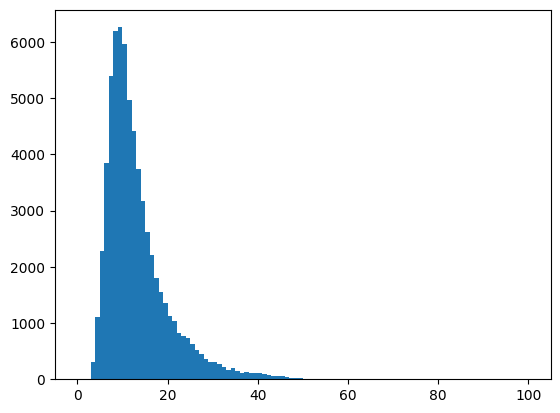

In [ ]:
plt.hist(data.question_size, bins=100, range=[0, 100],label='train');

<ul><li><h3>Inference</h3>
    <p>Mostly questions have length in range (10-20)</p>
    </li>
<hr>
<h3>Number of Unique words in the text</h3>

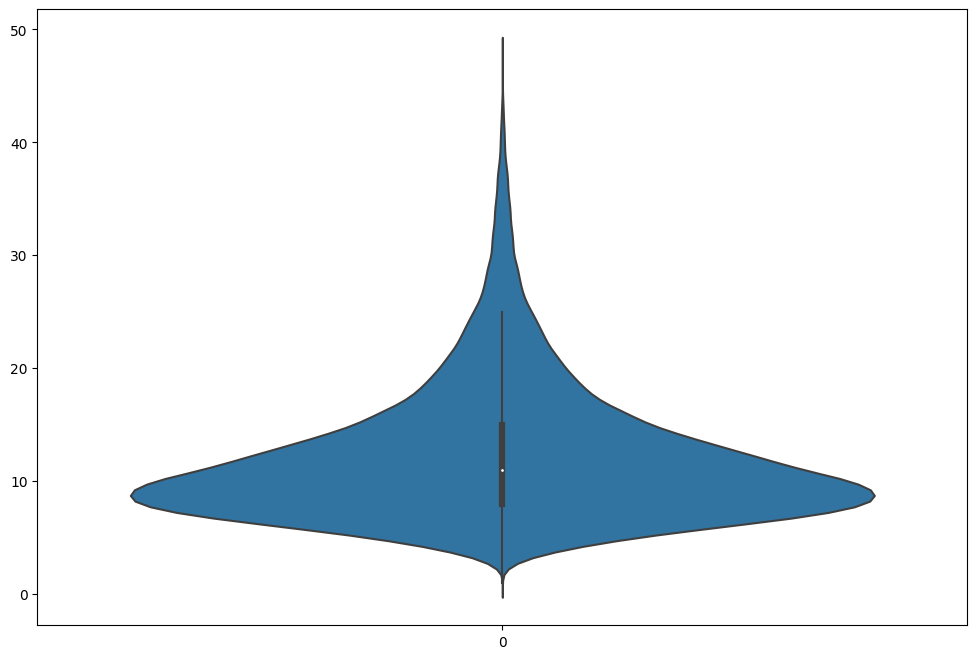

In [ ]:
data["num_unique_words"] = data["question_text"].apply(lambda x: len(set(str(x).split())))
plt.figure(figsize=(12,8))
sns.violinplot(data=data['num_unique_words'])
plt.show()

<h3>Average length of the words in the text</h3>

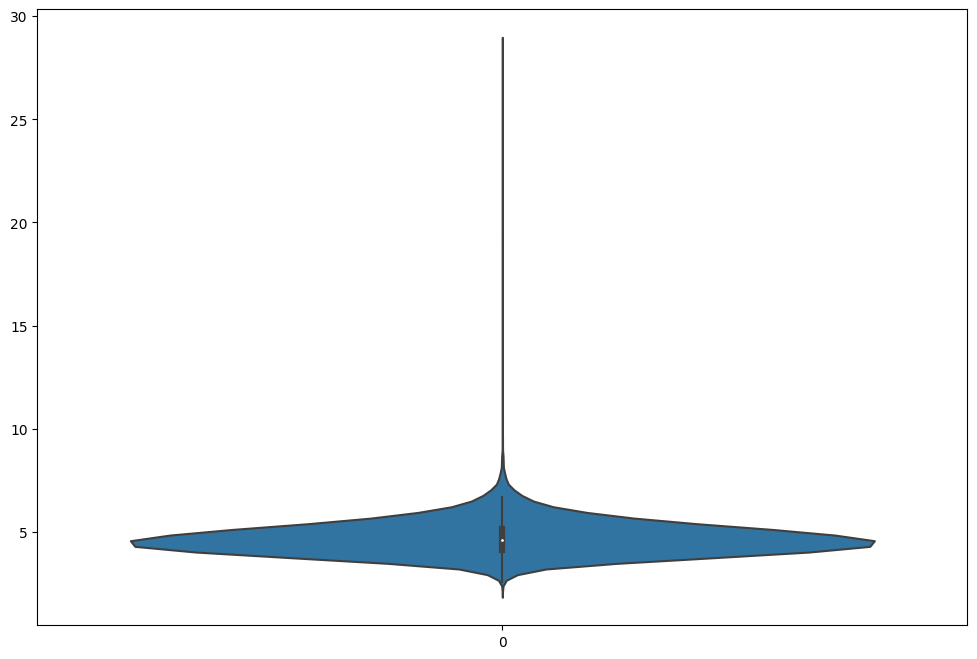

In [ ]:
data["mean_word_len"] = data["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
plt.figure(figsize=(12,8))
sns.violinplot(data=data['mean_word_len'])
plt.show()


<hr><center>
    <h1>Model Training</h1>
    </center>
    <hr>
<h2><center>Importing all the Necessary libraries</center></h2>
    <ul>
        <li><strong>Seaborn:</strong> Seaborn is a data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.</li><hr>
        <li><strong>sklearn.model_selection.train_test_split:</strong> This function from scikit-learn is used to split data arrays into two subsets: for training data and for testing data. It is commonly used for evaluating machine learning models.</li><hr>
        <li><strong>sklearn.feature_extraction.text.TfidfVectorizer:</strong> TfidfVectorizer is a scikit-learn class used to convert a collection of raw documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.</li><hr>
        <li><strong>sklearn.metrics:</strong> This module in scikit-learn provides various metrics for evaluating machine learning model performance, such as precision, recall, F1 score, and accuracy.</li><hr>
        <li><strong>sklearn.naive_bayes.MultinomialNB:</strong> Multinomial Naive Bayes is a probabilistic classifier based on Bayes' theorem, suitable for discrete data (e.g., word counts in text classification).</li><hr>
        <li><strong>sklearn.linear_model.LogisticRegression:</strong> Logistic Regression is a linear regression model used for binary classification tasks. It predicts the probability that an instance belongs to a particular class.</li><hr>
    </ul>

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (precision_score, recall_score, f1_score,accuracy_score,confusion_matrix)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("quora_preprocessed.csv")

In [ ]:
data=data.dropna()

In [ ]:
x = data['ques_lemmatized']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

<h3>TfidfVectorizer</h3><hr>
<p>We are using the TfidfVectorizer to convert textual data into a numerical representation suitable for machine learning algorithms.</p>
<p>TfidfVectorizer stands for "Term Frequency-Inverse Document Frequency Vectorizer" which is a popular technique used in natural language processing (NLP).</p>

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=100000)
vectoriser.fit(x_train)

x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

<h3>Logistic Regression</h3>
<p>Binary classification algorithm. Calculates probabilities using sigmoid function.</p>
<hr>
<h3>Accuracy</h3>
<p>Measure of correct predictions. Ratio of correct predictions to total predictions.</p>

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9434


<h3>F1 Score</h3>
<p>Harmonic mean of precision and recall. Balance between precision and recall for binary classification evaluation</p>

In [ ]:
f1score=f1_score(y_test,y_pred)
print(f"F1 Score:{f1score:.4f}")

F1 Score:0.3052


<h1>Confusion Matrix</h1>
<p>Confusion matrix is a table that visualizes the performance of a classification model.</p>
<table border="1">
<tr>
    <td></td>
            <td>Predicted Positive</td>
            <td>Predicted Negative</td>
        </tr>
        <tr>
            <td>Actual Positive</td>
            <td>True Positive (TP)</td>
            <td>False Negative (FN)</td>
        </tr>
        <tr>
            <td>Actual Negative</td>
            <td>False Positive (FP)</td>
            <td>True Negative (TN)</td>
        </tr>
    </table>
 <p>It helps in assessing the performance of a classifier by showing the count of true positive, false positive, true negative, and false negative predictions.</p>


<Axes: >

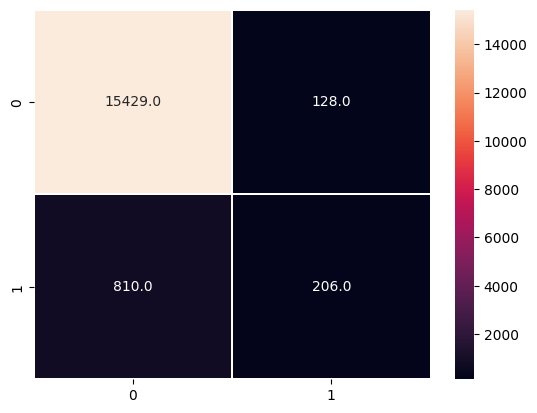

In [ ]:
confusion_lg = confusion_matrix(y_test, y_pred) #confusion metrics
sns.heatmap(confusion_lg, linewidths=0.01, annot=True,fmt= '.1f', color='red')

<h3>Multinomial Naive Bayes</h3>
<p>Multinomial Naive Bayes is a probabilistic classifier based on Bayes' theorem, suitable for discrete data (e.g., word counts in text classification)</p>

In [ ]:
nb = MultinomialNB()

# Train the model
nb.fit(x_train, y_train)
# Evaluate the model on the test set
y_p = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_p)
f1score=f1_score(y_test,y_p)
print(f"Test accuracy: {accuracy:.4f}")
print(f"F1 Score:{f1score:.4f}")

Test accuracy: 0.9387
F1 Score:0.0000


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
x = data['ques_lemmatized'].values
y = data['target'].values

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
lst_f1score_stratified = []
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=100000)
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    lst_accu_stratified.append(accuracy)
    F1score = f1_score(y_test,y_pred)
    lst_f1score_stratified.append(F1score)

<p>Stratified K-Fold Cross-Validation with 10 splits is applied to ensure that each fold has a balanced representation of the target classes.</p><p>The dataset is split into training and testing sets for each fold, and the TF-IDF vectorization is performed to convert text data to numerical features.</p><p> Then, a Logistic Regression classifier is trained on the training data and evaluated on the testing data for each fold.</p><p> Accuracy and F1 score are calculated for each fold and stored in separate lists for further analysis.</p>

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8892744003620455, 0.8891235480464625, 0.8882184341529642, 0.894252526776286, 0.8898778096243777, 0.894252526776286, 0.8912354804646251, 0.8865590586815507, 0.8968170161411978, 0.8939508221451199]

Maximum Accuracy That can be obtained from this model is: 89.68170161411977 %

Minimum Accuracy: 88.65590586815507 %

Overall Accuracy: 89.13561623170916 %


In [ ]:
print('List of possible F1 Scores:', lst_f1score_stratified)
print('\nMaximum f1 score That can be obtained from this model is:',
      max(lst_f1score_stratified)*100, '%')
print('\nMinimum f1 score:',
      min(lst_f1score_stratified)*100, '%')
print('\nOverall f1score:',
      np.mean(lst_f1score_stratified)*100, '%')

List of possible F1 Scores: [0.45305514157973176, 0.46467589220684635, 0.4626540971718637, 0.47094339622641507, 0.4640234948604993, 0.48035581912527786, 0.4694628403237675, 0.4681753889674682, 0.4818181818181818, 0.4780994803266518]

Maximum f1 score That can be obtained from this model is: 48.18181818181818 %

Minimum f1 score: 45.30551415797318 %

Overall f1score: 46.93263732606703 %


In [ ]:
!pip install transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
data = pd.read_csv('quora_preprocessed.csv')
data.head()

,qid,question_text,ques_lemmatized,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,quebec nationalist see province nation 1960s,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",adopted dog would encourage people adopt shop,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,velocity affect time velocity affect space geo...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,otto von guericke used magdeburg hemisphere,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,convert montra helicon mountain bike changing ...,0.0


In [ ]:
import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from collections import defaultdict
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

<h3>We are importing specific modules from the "transformers" library for natural language processing (NLP) tasks:</h3>
<ol>
    <li><h4>BertModel</h4>
        <p> This module represents the pre-trained BERT (Bidirectional Encoder Representations from Transformers) model. BERT is a widely used transformer-based model for various NLP tasks.</p>
    </li>
    <li><h4>BertTokenizer</h4>
        <p>This module provides the tokenizer for processing text data, which is used to convert text into numerical inputs suitable for the BERT model.</p>
    </li>
      <li><h4>AdamW</h4>
        <p>This module is an extension of the Adam optimization algorithm. It is often used for fine-tuning pre-trained transformer models like BERT, with added weight decay to prevent overfitting.</p>
    </li>
      <li><h4>get_linear_schedule_with_warmup</h4>
        <p>This module is used to create a learning rate scheduler that adjusts the learning rate during training. It linearly increases the learning rate during the warm-up phase and then linearly decreases it during the rest of the training process.</p>
    </li>
    </ol>

In [ ]:
pretrained_model_name = 'bert-base-cased'
maxlen = 160
batch_size = 16
epochs = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

<ol>
    <li><h4>pretrained_model_name = 'bert-base-cased</h4>
        <p>Specifies the BERT pre-trained model to use (cased version)</p>
    </li>
    <li><h4>maxlen = 160</h4>
        <p>Sets the maximum input sequence length for training/inference</p>
    </li>
      <li><h4>batch_size = 16</h4>
        <p> Defines the number of samples processed in one training iteration (batch).</p>
    </li>
      <li><h4>epochs = 1</h4>
        <p>Number of times the whole dataset is passed through during training</p>
    </li>
    <li><h4>device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")</h4>
        <p>Sets the device (GPU if available, else CPU) for computations.</p>
    </li>
    </ol>

In [ ]:
data['processed_text'] = data['ques_lemmatized'].astype('str')

In [ ]:
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)

In [ ]:
token_lens = []
for txt in data.processed_text:
    tokens = tokenizer.encode(txt, max_length=512, truncation = True)
    token_lens.append(len(tokens))

<ul><li>Calculates the token lengths of processed text using a tokenizer, which encodes the text into tokens with a maximum length of 512.</li><li><hr> It iterates through the dataset, appends the token lengths to "token_lens" list.</li></ul>

In [ ]:
class QuestionDataset(Dataset):

    def __init__(self, questions, targets, tokenizer, max_len):
        self.questions = questions
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.questions)
    def __getitem__(self, item):
        question = str(self.questions[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
          question,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt',
          truncation=True
        )
        return {
          'question_text': question,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
      }


<ul><li>Defining a custom dataset class, QuestionDataset, to preprocess and tokenize a list of questions and their corresponding targets (labels) for NLP tasks.</li><li><hr>The class inherits from PyTorch's Dataset class, which allows it to be used with PyTorch's DataLoader for efficient data loading during training and inference.</li></ul>

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size = 0.4,random_state = 42)
val_data, test_data = train_test_split(test_data,test_size = 0.6,random_state = 42)

In [ ]:
def data_loader(data, tokenizer, max_len, batch_size):
    ds = QuestionDataset(
      questions = data.processed_text.to_numpy(),
      targets = data.target.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
    )
    return DataLoader(
      ds,
      batch_size = batch_size,
      num_workers = 0
    )

<ul><li>Function that creates a DataLoader for NLP tasks.</li><hr><li>It uses the QuestionDataset class to preprocess data and tokenize using the provided tokenizer.</li><hr><li>The DataLoader loads data in batches with the specified batch size.</li>

In [ ]:
train_data_loader = data_loader(train_data, tokenizer, maxlen, batch_size)
val_data_loader = data_loader(val_data, tokenizer, maxlen, batch_size)
test_data_loader = data_loader(test_data, tokenizer, maxlen, batch_size)

data = next(iter(train_data_loader))
data.keys()

print (len(train_data_loader))
print (len(val_data_loader))
print (len(test_data_loader))

2486
663
995


<ul><li>Creating data loaders for training, validation, and testing using the data_loader function.</li><hr><li> It fetches the keys (features) of a single batch from the training data.</li><hr><li> It then prints the number of batches in each data loader: train, validation, and test.</li>

In [ ]:
# Shape of the torch
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


<ol>
    <li><h4>input_ids</h4>
        <p>This tensor represents the tokenized and encoded input sequence of the questions. It contains numerical representations of the tokens, which are used as input to the NLP model.</p>
    </li>
    <li><h4>attention_mask</h4>
        <p>This tensor indicates which elements of the input sequence are valid and which ones are padding. It has the same shape as input_ids and helps the model focus on relevant information.</p>
    </li>
      <li><h4>targets</h4>
        <p> This tensor holds the labels or target values corresponding to the input questions. It is used during training to compute the model's loss and evaluate its performance.</p>
    </li>
    </ol>

In [ ]:
data

{'question_text': ['important family',
  'multilevel security mandatory protection system',
  'word contain letter u',
  'key difference appsc group 1 upsc exam',
  'possible islam true religion incorrect jesus divine',
  'richard spencer handsome',
  'sue cbse mentaly harassing 11lack sutdents including',
  'much time take refund waiting ticket automatic cancellation',
  'singapore develop nuclear missile shield protect territory',
  'mensuration formula math',
  'mba good option 25 year experience time give cat 2018 3 year experience still aim iims please help',
  'outlandish act courtesy witnessed public place service person uniform',
  'better throw water wooden wall sauna opposed heater',
  'think duckduckgo',
  'moana attractive disney character time',
  'business management consist'],
 'input_ids': tensor([[  101,  1696,  1266,  ...,     0,     0,     0],
         [  101,  4321, 23403,  ...,     0,     0,     0],
         [  101,  1937,  4651,  ...,     0,     0,     0],
       

In [ ]:
class QuestionClassifier(nn.Module):
    def __init__(self, n_classes):
        super(QuestionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask,
          return_dict=False,
        )
        output = self.drop(pooled_output)
        return self.out(output)

<p>Defining a Question Classifier using BERT as a base model for NLP tasks.<p>

In [ ]:
model = QuestionClassifier(2)
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [ ]:
model

QuestionClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
model(input_ids, attention_mask)

tensor([[ 0.2697, -0.5679],
        [-0.0360, -0.6687],
        [ 0.1980, -1.0501],
        [ 0.3256, -0.2791],
        [ 0.5584, -1.4235],
        [ 0.2595, -1.0400],
        [ 0.3498, -1.0027],
        [ 0.2915, -1.0198],
        [ 0.3276, -0.7378],
        [ 0.0469, -0.8282],
        [ 0.3741, -0.2645],
        [ 0.6278, -1.2009],
        [ 0.6611, -0.3401],
        [ 0.1829, -1.1506],
        [ 0.3757, -1.3523],
        [ 0.2391, -1.0643]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def training_func(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    n_examples
):
    # Putting the model in the training mode
    model = model.train()

    losses = []
    correct_predictions = 0
    for dl in data_loader:
        input_ids = dl["input_ids"].to(device)
        attention_mask = dl["attention_mask"].to(device)
        targets = dl["targets"].to(device)
        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)


<ul><li>Sets the model to training mode.</li>
    <li>Iterates through the data_loader to process batches of data.</li>
    <li>Moves data and model to the specified device (e.g., GPU).</li>
    <li>Calculates model predictions and loss using the specified loss function.</li>
    <li>Performs backpropagation and gradient updates using the optimizer.</li>
    <li>Clips gradients to prevent exploding gradients.</li>
    <li>Updates the learning rate using the scheduler.</li>
</ul>

In [ ]:
def evaluate_model(model, data_loader, loss_fn, device, n_examples):

    # Putting the model in the Evaluation mode
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for dl in data_loader:
            input_ids = dl["input_ids"].to(device)
            attention_mask = dl["attention_mask"].to(device)
            targets = dl["targets"].to(device)
            outputs = model(
              input_ids=input_ids,
              attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)


<ul><li>Code defines an evaluation function for a PyTorch model.</li><hr><li> It calculates accuracy and loss on a given data_loader using a specified loss function and device, then returns the accuracy and mean loss.</li></ul>

In [ ]:
history = defaultdict(list)
best_accuracy = 0
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 30)
    train_acc, train_loss = training_func(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train_data)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = evaluate_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val_data)
    )
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/1
------------------------------
Train loss 0.1516336574820818 accuracy 0.9503444461205813
Val   loss 0.16073132507842972 accuracy 0.9488025645860834



<ul><li>The code trains a neural network model for multiple epochs, monitoring and storing training and validation accuracy/loss.</li><hr><li>The best model is saved based on the highest validation accuracy achieved.</li><ul>

In [ ]:
def predictions(model, data_loader):
    model = model.eval()
    question_texts = []
    predictions = []
    prediction_probs = []
    real_values = []
    with torch.no_grad():
        for dl in data_loader:
            texts = dl["question_text"]
            input_ids = dl["input_ids"].to(device)
            attention_mask = dl["attention_mask"].to(device)
            targets = dl["targets"].to(device)
            outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            question_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return question_texts, predictions, prediction_probs, real_values


In [ ]:
y_question_texts, y_pred, y_pred_probs, y_test = predictions(model,test_data_loader)

In [ ]:
i = 0
for text, pred, prob in zip(y_question_texts, y_pred, y_pred_probs):
    print(text, end = "   ")
    print(pred, end = "   ")
    print(prob)
    i+=1
    if i == 10:
        break

long take become billionaire scratch   tensor(0)   tensor([ 2.3536, -2.8808])
given challenging project work   tensor(0)   tensor([ 2.4195, -2.9058])
feel travel alone europe   tensor(0)   tensor([ 2.3666, -2.8863])
comparison jupyter notebook tiddlywiki   tensor(0)   tensor([ 2.2661, -2.8419])
possibility psoepp government spain form united front ciudadanos   tensor(0)   tensor([ 2.1931, -2.8116])
second amendment ever abolished   tensor(0)   tensor([ 2.4112, -2.9046])
real hill tv show   tensor(0)   tensor([ 2.2969, -2.8567])
olivia jane cockburn best known   tensor(0)   tensor([ 2.1401, -2.7894])
hard end friendship   tensor(0)   tensor([ 2.3742, -2.8889])
good protein powder vegetarian   tensor(0)   tensor([ 2.3925, -2.8970])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14934
           1       0.63      0.27      0.38       976

    accuracy                           0.95     15910
   macro avg       0.79      0.63      0.67     15910
weighted avg       0.93      0.95      0.93     15910



In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report= pd.DataFrame.from_dict(report)
report

,0,1,accuracy,macro avg,weighted avg
precision,0.953915,0.628297,0.94538,0.791106,0.933940
recall,0.989621,0.268443,0.94538,0.629032,0.945380
f1-score,0.971440,0.376167,0.94538,0.673803,0.934923
support,14934.000000,976.000000,0.94538,15910.000000,15910.000000


In [ ]:
report_df=report.drop(['weighted avg','macro avg'], axis=1)
report_df

,0,1,accuracy
precision,0.953915,0.628297,0.94538
recall,0.989621,0.268443,0.94538
f1-score,0.971440,0.376167,0.94538
support,14934.000000,976.000000,0.94538


In [ ]:
new_report_df=report_df.drop(['accuracy'],axis=1)
new_report_df

,0,1
precision,0.953915,0.628297
recall,0.989621,0.268443
f1-score,0.971440,0.376167
support,14934.000000,976.000000
